## Importing soundings

This code is useful for importing soundings, which is used in the hail-detection codes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.plots import SkewT
from datetime import datetime, timedelta
from metpy.units import units
import metpy.calc as metcalc

In [2]:
dataset = WyomingUpperAir.request_data(datetime(2019,5,28,0), 'ILX')


#get_ipython().run_line_magic('matplotlib', 'inline')

p = dataset['pressure'].values * units(dataset.units['pressure'])
#ip100 = np.where(p.magnitude==100.)[0][0]+1
#p = p[:ip100]
T = dataset['temperature'].values * units(dataset.units['temperature'])
#T = T[:ip100]
Td = dataset['dewpoint'].values * units(dataset.units['dewpoint'])
#Td = Td[:ip100]
u = dataset['u_wind'].values * units(dataset.units['u_wind'])
#u = u[:ip100]
v = dataset['v_wind'].values * units(dataset.units['v_wind'])
#v = v[:ip100]

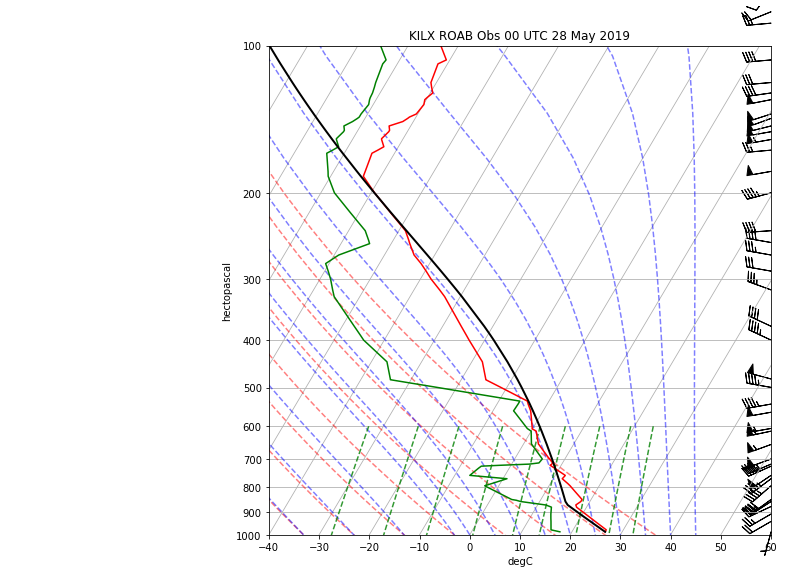

In [4]:
fig = plt.figure(figsize=(9,9))
skew = SkewT(fig)
skew.plot(p,T,'r')
skew.plot(p,Td,'g')
skew.plot_barbs(p[:-1:2], u[:-1:2], v[:-1:2])
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000,100)
skew.ax.set_xlim(-40,60)
prof = metcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)
plt.title('KILX ROAB Obs 00 UTC 28 May 2019', loc='center')
# plt.savefig('/home/jhemedinger/suli_projects/chicago-nowcast/images/ilx_sounding_00UTC.png', dpi=300)
plt.show()

In [5]:
p = np.array(dataset['pressure'].values * units(dataset.units['pressure']))
T = np.array(dataset['temperature'].values * units(dataset.units['temperature']))
Td = np.array( dataset['dewpoint'].values * units(dataset.units['dewpoint']))
u = np.array(dataset['u_wind'].values * units(dataset.units['u_wind']))
v = np.array(dataset['v_wind'].values * units(dataset.units['v_wind']))
z = np.array(dataset['height'].values * units(dataset.units['height']))

In [6]:
import xarray
ds = xarray.Dataset()

ds['temp'] = T
ds['height'] = z

In [8]:
ds.to_netcdf('./Sounding.nc')

In [9]:
ds = xarray.open_dataset('./Sounding.nc')

In [10]:
import netCDF4
ds = netCDF4.Dataset('./Sounding.nc')
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): temp(120), height(120)
    variables(dimensions): float64 temp(temp), int64 height(height)
    groups: 

In [11]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): temp(120), height(120)
    variables(dimensions): float64 temp(temp), int64 height(height)
    groups: 

In [12]:
dataset

pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0       986.0     178         26.6      17.6      195.0    7.0   1.811733   
1       977.0     260         26.6      15.6      203.0   10.0   3.907311   
2       939.0     610         23.4      14.6      240.0   22.0  19.052559   
3       925.0     742         22.2      14.2      235.0   21.0  17.202193   
4       906.8     914         20.6      13.7      240.0   23.0  19.918584   
5       878.0    1192         18.0      13.0      245.0   25.0  22.657695   
6       875.3    1219         17.9      12.6      245.0   25.0  22.657695   
7       869.0    1281         17.6      11.6      243.0   28.0  24.948183   
8       855.0    1420         18.2       6.2      237.0   35.0  29.353470   
9       850.0    1470         18.2       5.2      235.0   38.0  31.127778   
10      847.0    1500         18.2       4.2      234.0   38.0  30.742646   
11      814.9    1829         15.8       0.0      225.0   43.0  30.405592   
12      794.0    2049         14.2      -2.8      229.0   44.0  33.207222   
13      786.0    2134         13.5      -1.7      230.0   44.0  33.705955   
14      768.0    2329         11.8       0.8      233.0   47.0  37.535869   
15      758.0    2438         12.0      -5.7      235.0   48.0  39.319298   
16      756.0    2460         12.0      -7.0      236.0   48.0  39.793803   
17      730.7    2743          9.0      -6.1      245.0   43.0  38.971235   
18      724.0    2820          8.2      -5.8      246.0   44.0  40.196000   
19      721.0    2854          7.8      -2.2      247.0   45.0  41.422718   
20      717.0    2900          8.0       3.5      247.0   45.0  41.422718   
21      713.0    2946          8.0       5.3      248.0   46.0  42.650457   
22      700.0    3098          7.0       5.5      250.0   48.0  45.105246   
23      696.0    3145          6.6       5.2      250.0   48.0  45.105246   
24      653.7    3658          3.1       1.7      250.0   53.0  49.803709   
25      653.0    3667          3.0       1.6      250.0   53.0  49.803709   
26      614.0    4165          1.0       0.0      258.0   54.0  52.819970   
27      607.0    4257         -0.1      -1.0      260.0   54.0  53.179619   
28      606.2    4267         -0.1      -1.1      260.0   54.0  53.179619   
29      583.5    4572         -1.2      -3.3      265.0   55.0  54.790708   
..        ...     ...          ...       ...        ...    ...        ...   
90       52.3   20441        -61.7     -75.7      129.0    7.0  -5.440022   
91       50.6   20646        -59.1     -74.1       78.0   11.0 -10.759624   
92       50.0   20726        -59.1     -75.1       65.0   11.0  -9.969386   
93       50.0   20720        -59.1     -75.1       60.0   12.0 -10.392305   
94       47.5   21043        -58.5     -73.5       57.0   10.0  -8.386706   
95       45.3   21336        -59.1     -74.1       50.0   10.0  -7.660444   
96       43.9   21538        -59.5     -74.5       53.0   11.0  -8.784991   
97       41.1   21946        -59.1     -74.3       60.0   12.0 -10.392305   
98       39.2   22250        -58.8     -74.2       55.0   15.0 -12.287281   
99       35.6   22860        -58.2     -74.0       85.0   16.0 -15.939115   
100      34.1   23128        -57.9     -73.9       82.0   16.0 -15.844289   
101      30.8   23774        -56.6     -71.8       75.0   15.0 -14.488887   
102      30.0   23940        -56.3     -71.3       95.0   14.0 -13.946726   
103      29.4   24079        -56.0     -71.2      100.0   14.0 -13.787309   
104      28.0   24384        -55.2     -71.0       65.0   13.0 -11.782001   
105      27.4   24517        -54.9     -70.9       72.0   15.0 -14.265848   
106      26.7   24689        -55.0     -71.0       80.0   17.0 -16.741732   
107      25.1   25077        -55.1     -71.1       82.0   16.0 -15.844289   
108      23.1   25603        -53.4     -69.9       85.0   14.0 -13.946726   
109      22.1   25908        -52.4     -69.3      105.0    2.0  -1.931852   
1

In [13]:
dir(dataset)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
pressure          120 non-null float64
height            120 non-null int64
temperature       120 non-null float64
dewpoint          120 non-null float64
direction         119 non-null float64
speed             119 non-null float64
u_wind            119 non-null float64
v_wind            119 non-null float64
station           120 non-null object
station_number    120 non-null int64
time              120 non-null datetime64[ns]
latitude          120 non-null float64
longitude         120 non-null float64
elevation         120 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 13.2+ KB


In [16]:
#from skewt import SkewT

In [17]:
sounding = SkewT.Sounding(dataset)

AttributeError: type object 'SkewT' has no attribute 'Sounding'